In [1]:
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg

In [2]:
import matplotlib.pyplot as plt

In [3]:
import cProfile
import pstats
%load_ext line_profiler

--------

### Set the number of resources

In [4]:
L = 20

### Define the ancestral phenotype (traits vector)

In [5]:
anc_phenotype = utils.random_matrix(shape=(1, L), mode='binomial')

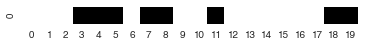

In [6]:
viz.matrix_plot(anc_phenotype)

### Define the system biochemistry (trait/resource interactions)

In [7]:
J = utils.random_matrix((L, L), 'tikhonov_sigmoid')

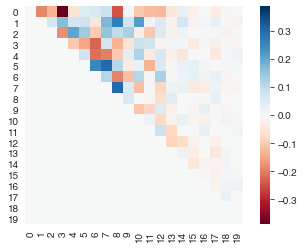

In [8]:
viz.matrix_plot(J)

In [9]:
np.sum(J)

0.18781013060002516

### Parameterize and instantiate the Consumer-Resource System

In [10]:
anc_system = ConsumerResourceSystem(sigma=anc_phenotype, 
                                    b=1, 
                                    k=1e10,
                                    c=0.1, chi=0.5, J=J, 
                                    mu=1e-10,
                                    resource_consumption_mode='fast_resource_eq',
                                    resource_inflow_mode='none',
                                    threshold_min_rel_abundance=1e-6,
                                    N_init=1, R_init=1)

In [11]:
print(anc_system.type_set._sigma.alloc)

(1, 20)


In [12]:
print(anc_system.mutant_set._sigma.alloc)

(20, 20)


In [13]:
print(anc_system.type_set.energy_costs)

[3.9711374]


In [14]:
print(anc_system.type_set.type_ids)

[-886706961228891447]


In [15]:
print(anc_system.type_set.parent_indices)

[None]


In [16]:
print(anc_system.type_set.lineage_ids)

['1']


In [17]:
print(anc_system.type_set.phylogeny)

{'1': {}}


In [18]:
# stop

### Simulate dynamics

In [19]:
# just to pre-compile the dynamics njit function
# anc_system.dynamics(*((0,) + (np.zeros(L+L+1),) + anc_system.get_params()))

In [20]:
# anc_system.run(T=1000)

In [21]:
# %lprun -f anc_system.dynamics anc_system.run(T=1000)
# %lprun -f anc_system.handle_mutation_event anc_system.run(T=1000)

In [22]:
profiler = cProfile.Profile()
# %lprun -f anc_system.dynamics profiler.runcall(anc_system.run)
# %lprun -f ConsumerResourceSystem.growth_rate profile.runcall(anc_system.run)
# %lprun -f anc_system.event_low_abundance profiler.runcall(anc_system.run)
# %lprun -f TypeSet.add_type profiler.runcall(anc_system.run)
# %lprun -f TypeSet.generate_mutant_set profiler.runcall(anc_system.run)

%lprun -f anc_system.run profiler.runcall(anc_system.run)

Timer unit: 1e-06 s

Total time: 16.5095 s
File: /Users/ryan/Dropbox/Projects/ResearchProjects/eco-evo-crm/ecoevocrm/src/ecoevocrm/consumer_resource_system.py
Function: run at line 204

Line #      Hits         Time  Per Hit   % Time  Line Contents
   204                                               def run(self, T=1e4, dt=None, integration_method='default'):
   205                                           
   206         1         35.0     35.0      0.0          t_start   = self.t
   207         1          2.0      2.0      0.0          t_elapsed = 0
   208                                           
   209         1         41.0     41.0      0.0          self._t_series.expand_alloc((self._t_series.alloc[0], self._t_series.alloc[1]+int(T/dt if dt is not None else T/0.1)))
   210         1         33.0     33.0      0.0          self._N_series.expand_alloc((self._N_series.alloc[0], self._N_series.alloc[1]+int(T/dt if dt is not None else T/0.1)))
   211         1        275.0    275.0

In [23]:
ps = pstats.Stats(profiler)
ps.sort_stats('cumtime')
ps.print_stats()

         3016398 function calls (3016385 primitive calls) in 16.673 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.574    0.574   16.673   16.673 /Users/ryan/Dropbox/Projects/ResearchProjects/eco-evo-crm/ecoevocrm/src/ecoevocrm/consumer_resource_system.py:204(run)
     2551    0.796    0.000    9.397    0.004 /usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/ivp.py:156(solve_ivp)
    12670    0.089    0.000    6.194    0.000 /usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/base.py:159(step)
    12670    0.157    0.000    6.106    0.000 /usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/lsoda.py:140(_step_impl)
    12670    0.448    0.000    5.929    0.000 /usr/local/lib/python3.8/site-packages/scipy/integrate/_ode.py:1338(run)
    28072    0.068    0.000    5.461    0.000 /usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/base.py:136(fun)
    28072    0.052    0.000  

In [24]:
print(len(anc_system.t_series))

15222


### Visualize results

In [25]:
anc_system.reorder_types()

In [26]:
np.asarray(anc_system.type_set.lineage_ids)[anc_system.extant_type_indices]

array(['1.6.1.2.10.3.2.4.1', '1.6.1.2.10.3.2.4.1.1', '1.6.1.2.10.3.2.6.1',
       '1.6.15.1.5.1.1.1.4.3.3', '1.6.15.1.5.1.1.3.1.3',
       '1.6.15.1.5.1.1.3.1.3.5', '1.6.15.1.5.1.1.3.2',
       '1.6.15.1.5.1.1.3.2.2.1', '1.6.15.1.5.1.1.3.2.2.1.1',
       '1.6.15.1.5.1.1.3.2.2.1.2', '1.6.15.1.5.1.1.3.2.2.1.3',
       '1.6.15.3.5.3.2.2.6', '1.6.15.3.5.3.2.2.6.2', '1.6.15.3.5.3.5.1.2',
       '1.6.15.3.5.3.5.1.3', '1.6.15.3.5.3.5.2', '1.6.15.3.5.3.5.2.1',
       '1.6.15.3.5.3.5.2.1.1', '1.6.15.3.5.3.5.2.1.3',
       '1.6.15.3.5.3.5.2.1.4', '1.6.15.3.5.3.5.2.2', '1.6.8.3.8.5.2',
       '1.6.8.3.8.5.2.5', '1.6.8.3.8.5.2.5.1', '1.6.8.3.8.5.2.6',
       '1.6.8.8.5.3.3.1.1', '1.6.8.8.5.3.3.1.1.1', '1.6.8.8.5.3.3.1.1.2',
       '1.6.8.8.5.3.3.2.1.1', '1.6.8.8.5.3.3.2.1.1.4',
       '1.6.8.8.5.3.3.2.1.2', '1.6.8.8.5.3.3.2.1.2.2',
       '1.6.8.8.5.3.3.2.1.4', '1.6.8.8.5.3.3.2.1.4.1',
       '1.6.8.8.5.3.3.2.1.4.1.1', '1.6.8.8.5.3.3.2.1.4.1.2',
       '1.6.8.8.5.3.3.3.4', '1.6.8.8.5.3.3.3.4.1', '

In [82]:
type_colors = viz.color_types_by_phylogeny(anc_system.type_set, apply_palette_depth=2, highlight_clades='all')

<AxesSubplot:>

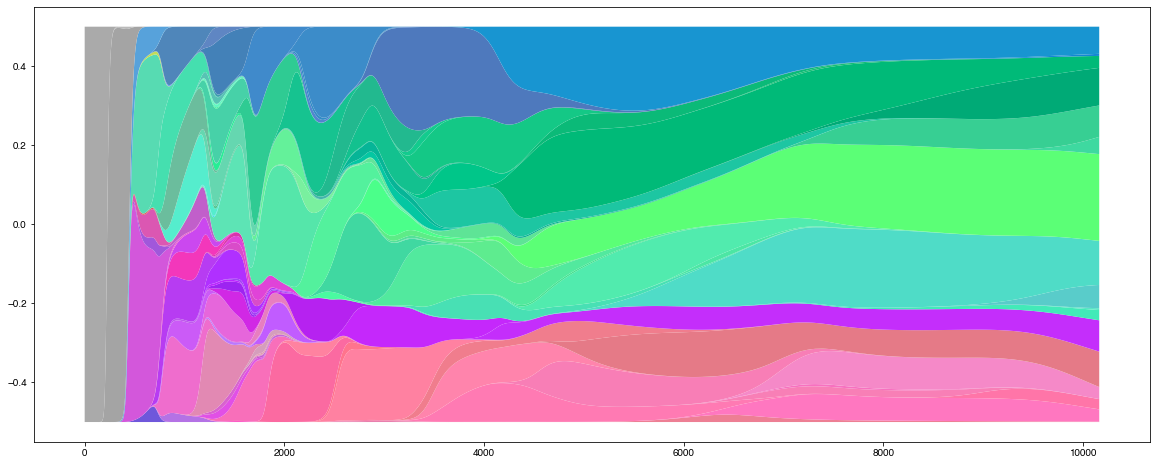

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(anc_system, ax=ax, type_colors=type_colors, relative_abundance=True)

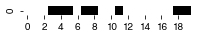

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(3, 12))
viz.matrix_plot(anc_phenotype, ax=ax)

In [30]:
# fig, ax = plt.subplots(1, 1, figsize=(3, 12))
# viz.matrix_plot(anc_system.type_set.sigma, ax=ax)

In [31]:
# anc_system.extant_type_indices

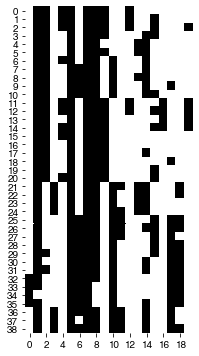

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(3, 12))
viz.matrix_plot(anc_system.get_extant_type_set().sigma, ax=ax)

In [33]:
# fig, ax = plt.subplots(1, 1, figsize=(3, 12))
# viz.matrix_plot(anc_system.extant_mutant_set.sigma, ax=ax)

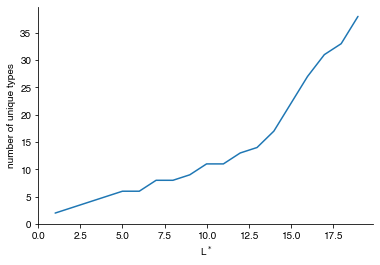

In [34]:
viz.Lstar_types_plot(anc_system)

In [35]:
N_end = anc_system.N_series[:,-1]
np.count_nonzero((N_end > 0) & (N_end < 1e4))

2

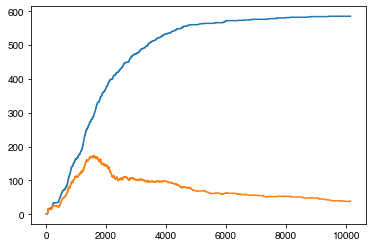

In [36]:
a = (anc_system.N_series > 0).argmax(axis=1)
n = []
for t_idx in range(anc_system.t_series.shape[0]):
    n.append(np.count_nonzero(a <= t_idx)) 
plt.plot(anc_system.t_series, n)
plt.plot(anc_system.t_series, (anc_system.N_series > 0).sum(axis=0))

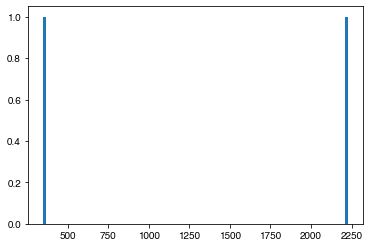

In [37]:
plt.hist(anc_system.N_series[(anc_system.N_series[:,-1]>0)&(anc_system.N_series[:,-1]<1e4),-1], bins=100)
# plt.xlim((0,100))
plt.show()

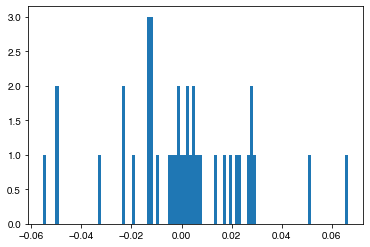

In [38]:
r = ConsumerResourceSystem.growth_rate(anc_system.N[:, np.newaxis], anc_system.R, anc_system.type_set.sigma, anc_system.type_set.b, anc_system.type_set.k, anc_system.type_set.eta, anc_system.type_set.l, anc_system.type_set.g, anc_system.type_set.energy_costs, anc_system.resource_set.omega, anc_system.resource_consumption_mode)

plt.hist(r[anc_system.N > 0] , bins=100)
plt.show()

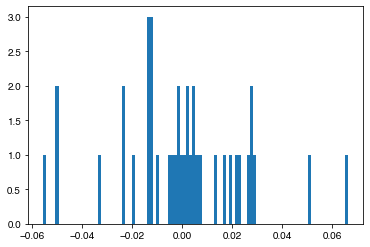

In [39]:
s = r - np.mean(r[anc_system.N > 0])

plt.hist(s[anc_system.N > 0] , bins=100)
plt.show()

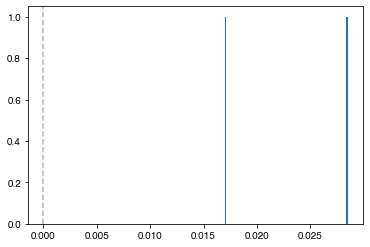

In [40]:
r_lowabd = r[(anc_system.N > 0) & (anc_system.N < 1e4)]

plt.hist(r_lowabd, bins=100)
plt.axvline(0, color='k', alpha=0.3, ls='--')
plt.show()

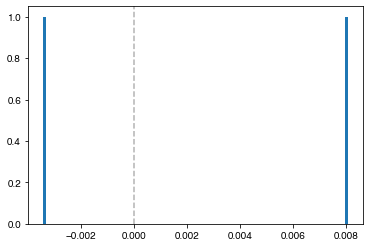

In [41]:
s_lowabd = r[(anc_system.N > 0) & (anc_system.N < 1e4)] - np.mean(r[r > 0])

plt.hist(s_lowabd, bins=100)
plt.axvline(0, color='k', alpha=0.3, ls='--')
plt.show()

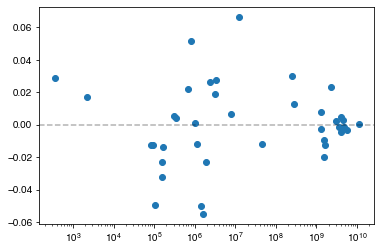

In [42]:
plt.scatter(anc_system.N[anc_system.N > 0], r[anc_system.N > 0])
plt.axhline(0, color='k', alpha=0.3, ls='--')
plt.xscale('log')
plt.show()

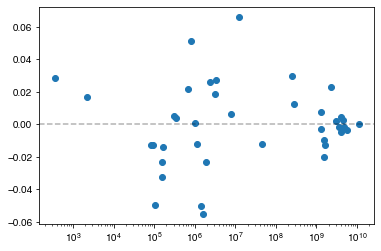

In [43]:
plt.scatter(anc_system.N[anc_system.N > 0], s[anc_system.N > 0])
plt.axhline(0, color='k', alpha=0.3, ls='--')
plt.xscale('log')
plt.show()

In [44]:
anc_system.type_set.sigma.shape

(585, 20)

In [45]:
a = np.where(anc_system.N_series > 0)

In [46]:
anc_system.type_set.mu.shape

()

In [47]:
anc_system.t_series.shape

(15222,)

In [48]:
anc_system.N_series.shape

(585, 15222)

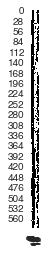

In [49]:
viz.matrix_plot(anc_system.type_set.sigma)

In [50]:
anc_system._t_series.alloc

(1, 15222)

In [51]:
anc_system.t_series

array([0.00000000e+00, 0.00000000e+00, 7.85690690e-02, ...,
       1.01592288e+04, 1.01628501e+04, 1.01630260e+04])

In [52]:
anc_system.t

10163.025983969803

In [53]:
anc_system._N_series.alloc

(585, 15222)

In [54]:
anc_system.N_series

array([[1.        , 1.        , 1.03268812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [55]:
anc_system.N

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.51934669e+09,
       2.72505566e+08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.20911725e+04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [56]:
anc_system.N_series.shape

(585, 15222)

In [57]:
anc_system._N_series._arr

array([[1.        , 1.        , 1.03268812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [58]:
anc_system._N_series._arr[0]

array([1.        , 1.        , 1.03268812, ..., 0.        , 0.        ,
       0.        ])

In [59]:
anc_system.type_set._sigma.shape

(585, 20)

In [60]:
anc_system.type_set.sigma.shape

(585, 20)

In [61]:
anc_system.mutant_set.sigma.shape

(11700, 20)